# Taraneh Andalib, March 2018

##  Here is my solution to the Kaggle Titanic problem.

Preparing the relevant libraries:

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
import matplotlib.ticker as ticker
%matplotlib inline


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


###### Loading the data:

In [2]:
train_set = pd.read_csv('./train.csv')

###### Looking at only 10 rows of the data to see how it looks like:

In [3]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


###### The following line we check for the null values: isnull is a pandas object that looks for missing values

###### In the following table 'True' means there is a null value and 'False' means there is none.

In [4]:
train_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### Based on the table above, "Age" , "Cabin" and "Embarked" have null values and should be fixed.

## Now let's visualize the data to find relations between different parameters. This is essential as it helps to figure out the survival probability.

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


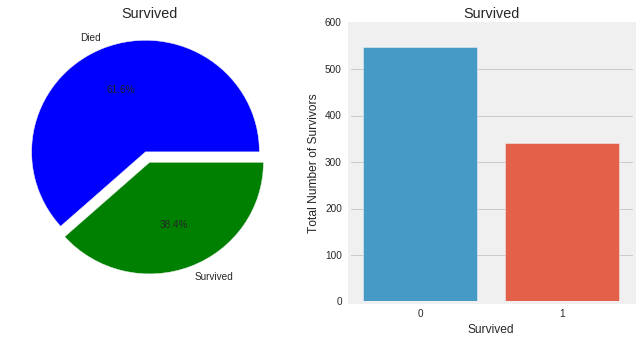

In [6]:
f,ax=plt.subplots(1,2,figsize=(10,5))
train_set['Survived'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',labels = {'Died' , 'Survived'} ,ax=ax[0],shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_set, ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('Total Number of Survivors')
plt.show()

###### The graphs show that over 60% of the passangers did not survive.

In [7]:
num_lines = sum(1 for line in open('./train.csv'))
print num_lines

892


In fact, out of 892 passenger on the training set, about 530 did not make it.

#### Now to explore the data more, I will try to find the correlation beteween the other features and survival. For example, how many of the survivors were female, which class had the most survivors and etc.

###### Let's group the survival and the sex:

In [8]:
train_set.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

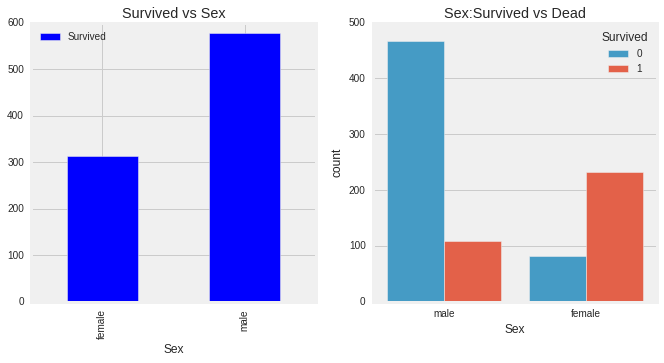

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,5))
train_set[['Sex','Survived']].groupby(['Sex']).count().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_set,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

###### These plots show that females survived more than males(almost double). But we still have no information about the total number of men and women and this plot has to be normalized to get the correct ratios.

#### Now let's check the 'Class' feature

In [10]:
pd.crosstab(train_set.Pclass,train_set.Survived,margins=True).style.background_gradient(cmap='summer_r')

###### The table above shows that in class 1 around half of them survived, in class 2 and 3 however, most people did not survive and it is more severe for class 3. So in other words, if you were in class 1 and you were a women, you had a very much higher chance of survival.

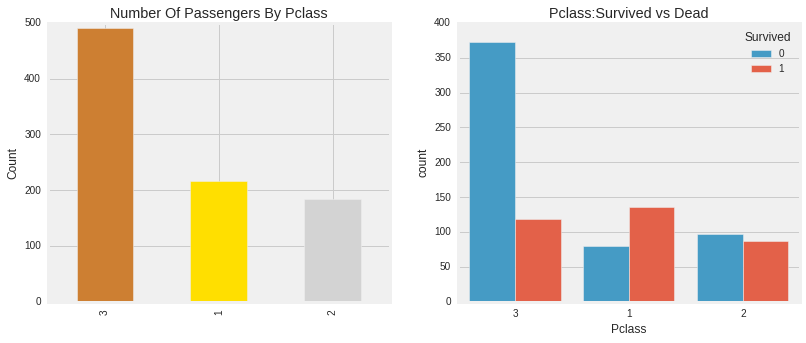

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,5))
train_set['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_set,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

###### This plot confirms what I said earlier that if you had more money and were from class one you had a higher chance of survival. You should also notice something here; Eventhough the number of died passengers on class 3 is higher, this class also has the most number of passengers. It means to be fair, these charts all have to be normalized to get a good sense.

#### Now let's see the combination of sex and Pclass together.

In [12]:
pd.crosstab([train_set.Sex,train_set.Survived],train_set.Pclass,margins=True).style.background_gradient(cmap='summer_r')

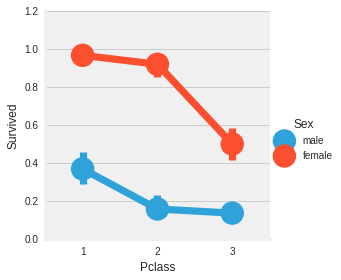

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_set, order = [1,2,3])
plt.show()

###### Again as discussed earlier, it is shown here that women from class 1 had a higher chance of rescue and women in generel were given the priority while rescue.

#### Now let's take a look at age.

In [14]:
print('Oldest Passenger was of:',train_set['Age'].max(),'Years')
print('Youngest Passenger was of:',train_set['Age'].min(),'Years')
print('Average Age on the ship:',train_set['Age'].mean(),'Years')

('Oldest Passenger was of:', 80.0, 'Years')
('Youngest Passenger was of:', 0.41999999999999998, 'Years')
('Average Age on the ship:', 29.69911764705882, 'Years')


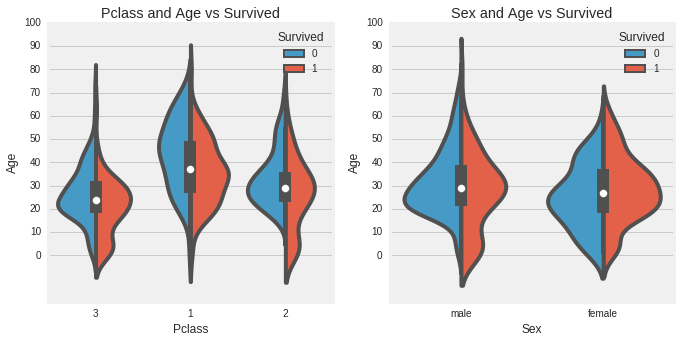

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.violinplot("Pclass","Age", hue="Survived", data=train_set,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_set,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

##### Now it is time to fix the null values in the 'Age' column. The first step would be to find out which rows have null values. We can extract the initials from the names to associate that with the null values.

In [16]:
train_set['Initial']=0
for i in train_set:
    train_set['Initial']=train_set.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.crosstab(train_set.Initial,train_set.Sex).T.style.background_gradient(cmap='summer_r')

##### There are some misspelled Initials like Mlle or Mme that stand for Miss. I will also simplify this buy only having these intials: Miss,Mrs Mr and other.

In [18]:
train_set['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                             ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']
                             ,inplace=True)

##### Here we check the average age by their initials.

In [19]:
train_set.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Now I replace the average values of each initials with the NaN values.

In [20]:
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Mr'),'Age']=33
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Mrs'),'Age']=36
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Master'),'Age']=5
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Miss'),'Age']=22
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Other'),'Age']=46

##### Now we have to check and see if there is any null values left:

In [21]:
train_set.Age.isnull().any()

False

##### so now again we can go back and look at the correlation between age and survival.

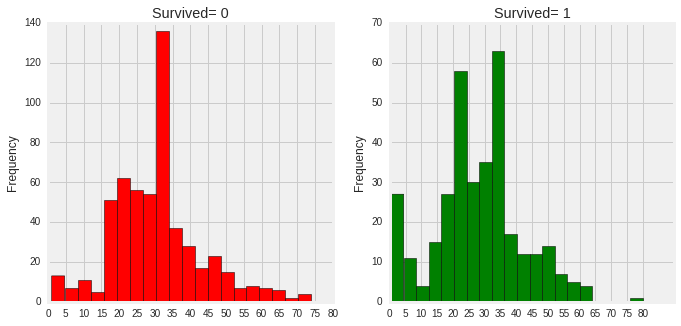

In [22]:
f,ax=plt.subplots(1,2,figsize=(10,5))
train_set[train_set['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_set[train_set['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

##### The graphs show that most toddlers below the age of 5 were saved. The oldest passenger was saved and the biggest lost was in the age of 15-30.

##### now we look at the Pclass and Initials relation.

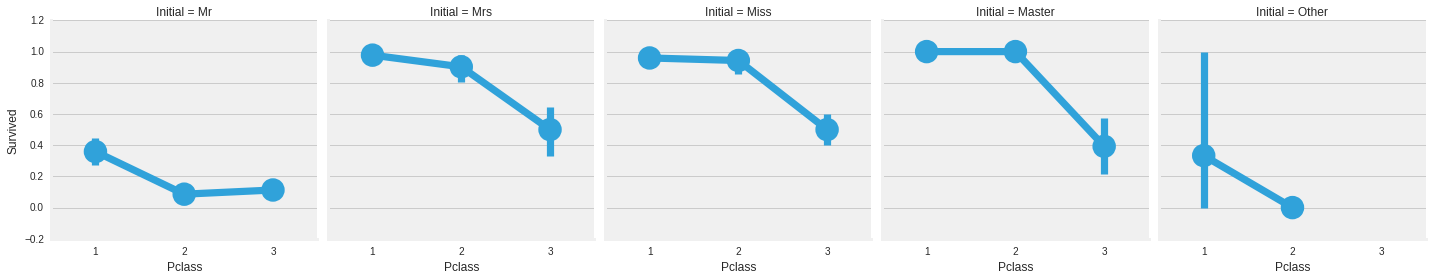

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_set , order = [1,2,3])
plt.show()

##### It shows that for all initials, most first class passengers were saved. Typically women and children also were saved regardless of the class.

###### Now let's take a look at the relation between Pclass and Embarked vs sex and survival:

In [24]:
pd.crosstab([train_set.Embarked,train_set.Pclass],[train_set.Sex,train_set.Survived],margins=True)\
.style.background_gradient(cmap='viridis')

##### The table above shows the chances of survival based on the port of embarkation. There are three ports: C, Q and S and I am not sure if I can conclude anything from this yet. Maybe a factor plot of embarkation and Pclass would help simplify this a bit.

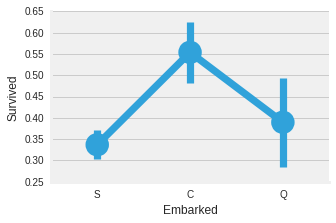

In [25]:
sns.factorplot('Embarked','Survived',data=train_set)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

##### So as the factor plot shows, most survival happened for people who embarked at port C.

##### A better way to look at this information is to look at count plots of Embarked, embarked and sex, embarked and pcalss and embarked and survival. This will simplify things a bit.

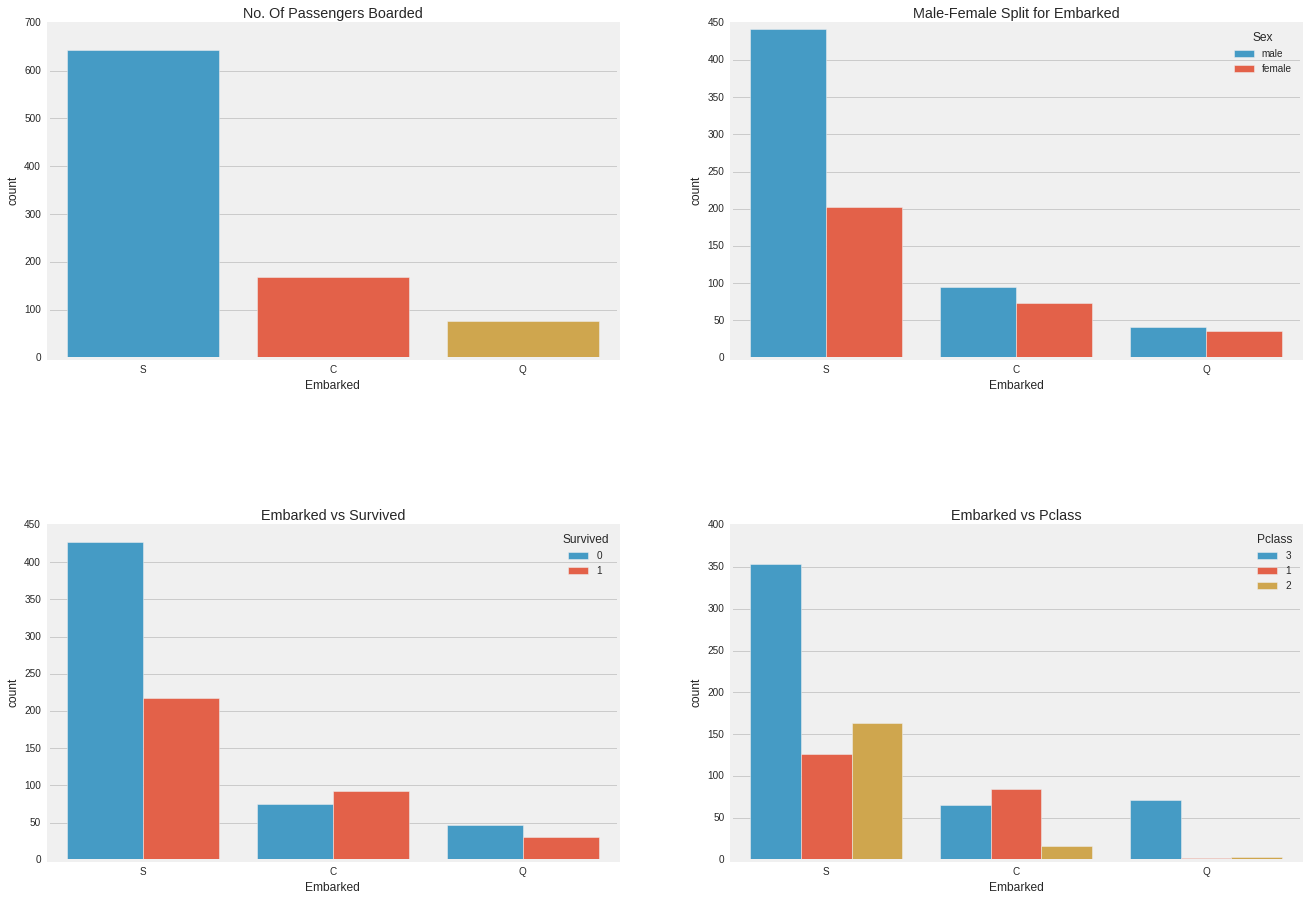

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_set,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_set,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_set,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_set,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

#### So it shows that most of the passengers embarked from port S and as a result the number of survivals and deaths are the most for port S. One interesting thing for port C is that it is the only port that the number of survivors are more than deaths. It also is consistent with previous findings because it shows that most of the passengers that embarked from port C were in class 1.

In [27]:
#sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_set)
#plt.show()

##### Now since most of the passengers boarded from port S we should replace the NaN values with S

In [28]:
train_set['Embarked'].fillna('S',inplace=True)

###### Now we check if it worked and if there is still any nulls left:

In [29]:
train_set.Embarked.isnull().any()

False

###### Now looking at the next feature "SibSp": (siblings and spouses)

In [30]:
pd.crosstab(train_set.SibSp,train_set.Survived).style.background_gradient(cmap='viridis')

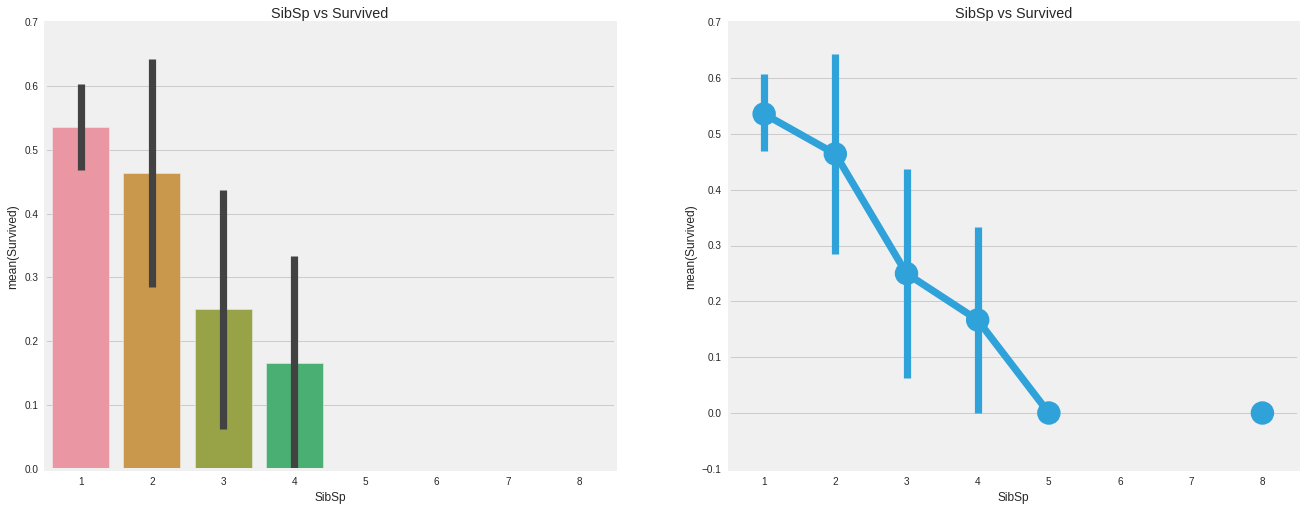

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=train_set, ax=ax[0],order = [1, 2, 3, 4, 5, 6, 7, 8])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_set,ax=ax[1],order = [1, 2, 3, 4, 5, 6, 7, 8])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

##### The graph shows that families of 2 or less had higher chance of survival.

##### Now we should see the relation between the Pclass and SibSp

In [32]:
pd.crosstab(train_set.SibSp,train_set.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


##### As it can be seen, Most passengers had 1 or non siblings or spouses aboard. Larger families mostly belong to class C.

##### Now let's look at the 'Parch' feature and how it is correlated with Pclass. This basically is the number of parents/childrens aboard.

In [33]:
pd.crosstab(train_set.Parch,train_set.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


##### Again as mentioned earlier, larger families belong to class C most of the time. Let's visualize it more.

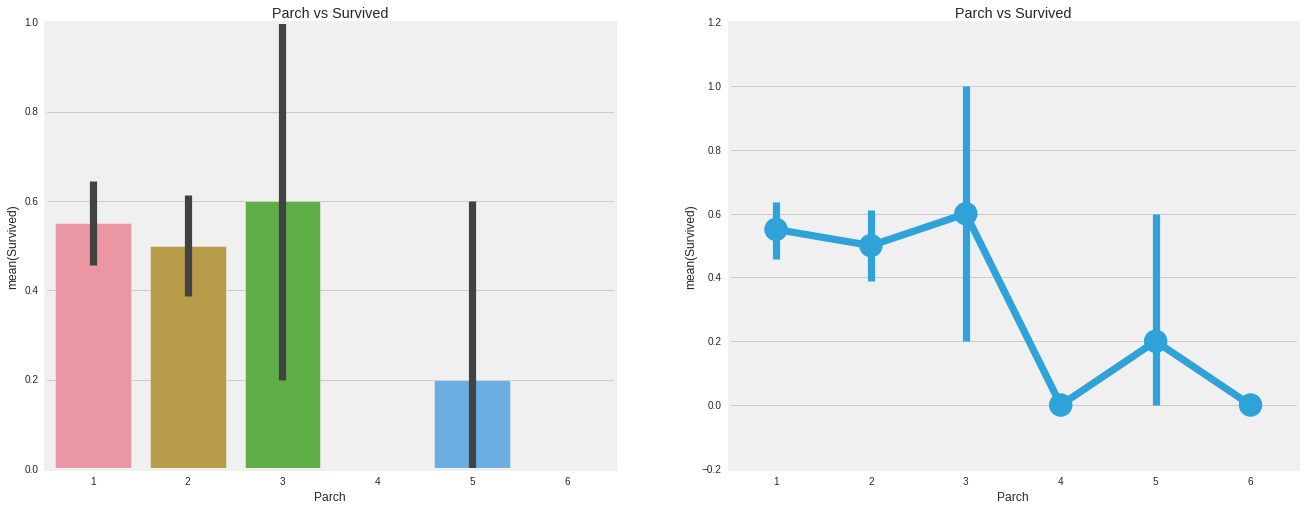

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train_set,ax=ax[0], order = [1,2,3,4,5,6])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train_set,ax=ax[1], order = [1, 2, 3, 4, 5, 6])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

##### Interesting enough, no family of 4 survived (?). Maybe there was no family of that size?

##### Now I take a look at the 'Fare' feature. I like to see the ticket price as a function of Pclass and survival. But I have to categorize the fare into high, mean and low. It is because if you look at the table at the start of this notebook you will realize that there are so many different amounts for 'Fare' so it is better to bin them in separete groups.

In [35]:
print('Max Fare:',train_set['Fare'].max())
print('Min Fare:',train_set['Fare'].min())
print('Mean Fare:',train_set['Fare'].mean())

('Max Fare:', 512.32920000000001)
('Min Fare:', 0.0)
('Mean Fare:', 32.204207968574636)


##### Let's see how the Fare distribution looks like for each class.

/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


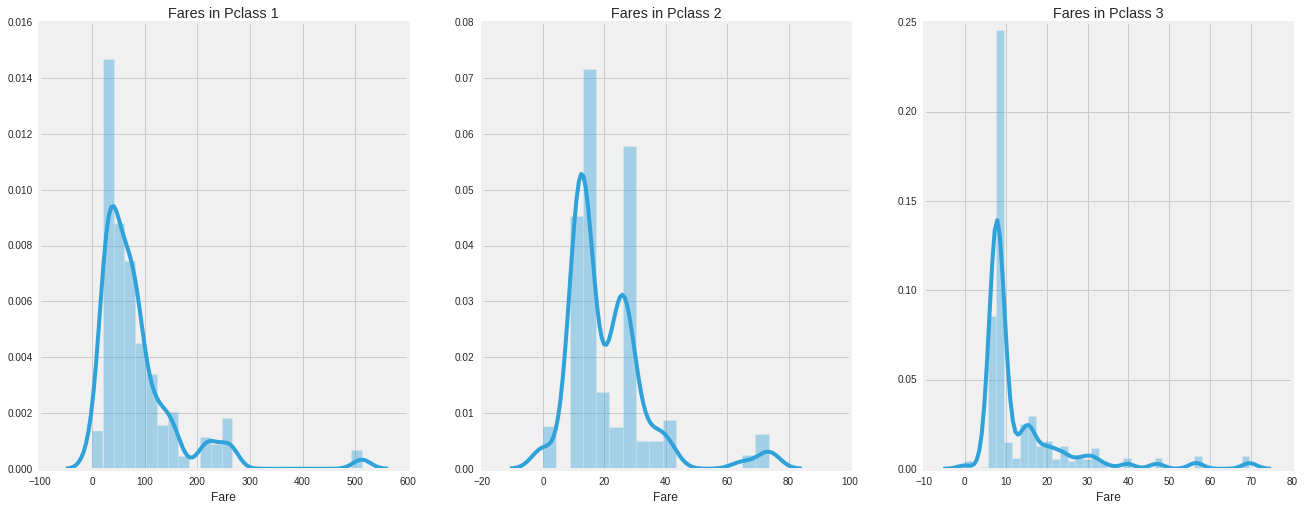

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_set[train_set['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_set[train_set['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_set[train_set['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

##### It shows that the ticket price for first class was almost 10 times more expensive than class 3! wow!

##### After seeing all these relations between features I think it is a good idea to take an overall look at the relation between all the features all together. The map below does just that.

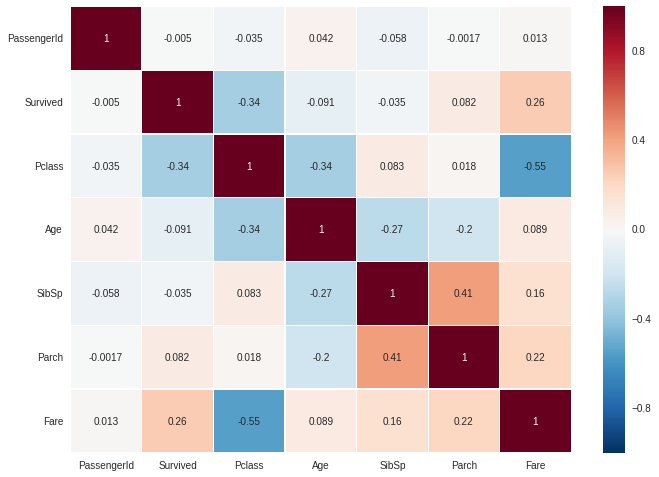

In [37]:
sns.heatmap(train_set.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

It shows that survival and Fare are highly correlated (the more expensive the ticket , the higher chance of survival) and obviously Parch and SibSp are correlated. It shows that Pclass and Fare are not as correlated as I expected which is very interesting. I wonder why that is.

Now let's take a look at the Age feature. For features like this it is always a good idea to bin the date:

In [38]:
train_set['Age_band']=0
train_set.loc[train_set['Age']<=16,'Age_band']=0
train_set.loc[(train_set['Age']>16)&(train_set['Age']<=32),'Age_band']=1
train_set.loc[(train_set['Age']>32)&(train_set['Age']<=48),'Age_band']=2
train_set.loc[(train_set['Age']>48)&(train_set['Age']<=64),'Age_band']=3
train_set.loc[train_set['Age']>64,'Age_band']=4
train_set.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
train_set['Age_band'].value_counts().to_frame()


,Age_band
1,382
2,325
0,104
3,69
4,11


Now let's see how age and survival for each class are correlated:

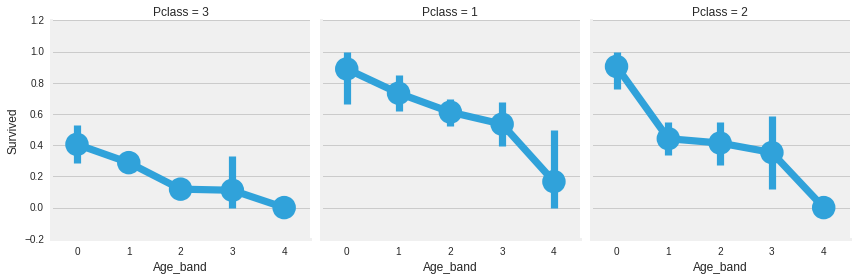

In [40]:
sns.factorplot('Age_band','Survived',data=train_set,col='Pclass', order = [0,1,2,3,4])
plt.show()

The overal trend is that the suvival rate decreases as the Pclass increases which is so sad. one thing that I can observe in all classes though is that the age band of 0 (kids less than 16) had a very high chance of survival.

##### Now let's do the same thing with the family size.

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


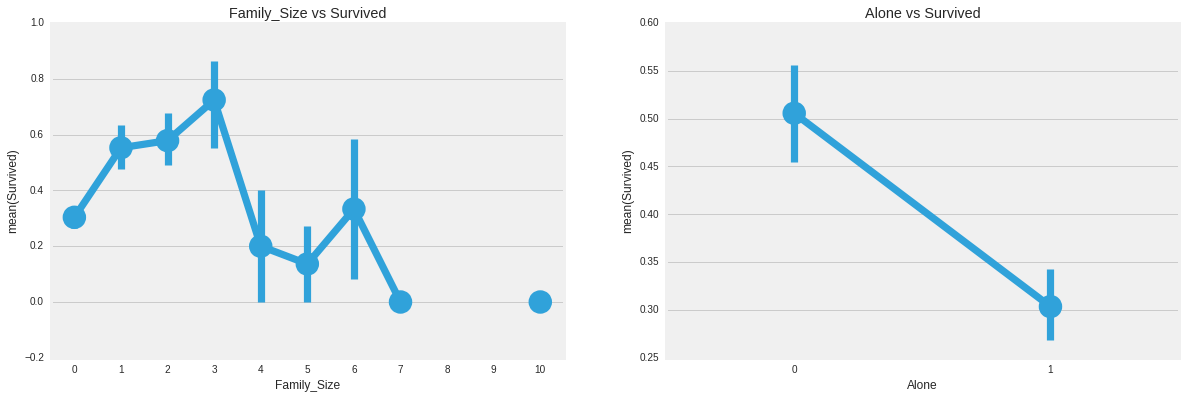

In [41]:
train_set['Family_Size']=0
train_set['Family_Size']=train_set['Parch']+train_set['SibSp']#definition of the family size
train_set['Alone']=0
train_set.loc[train_set.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train_set,ax=ax[0],\
              x_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10] )
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train_set,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

##### The overall trend shows that larger families had lower chance of survival. The largest family size was 10 and they did not survive. On top of that, people who travelled by themselves had lower chance of survival. It actually is so sad and surprising.

##### Now let's see how lonely travellers are spread over different classes:

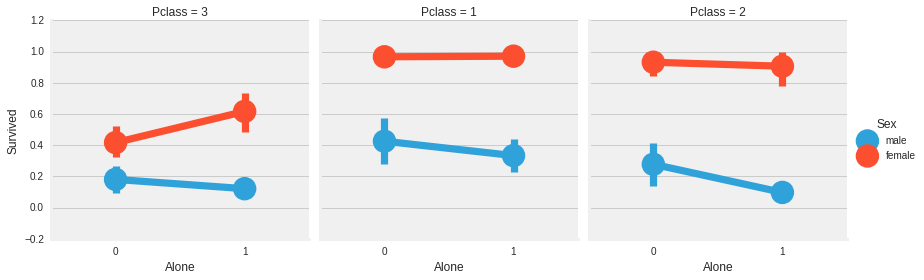

In [42]:
sns.factorplot('Alone','Survived',data=train_set,hue='Sex',col='Pclass')
plt.show()

##### Overall alone female passengers had higher chance of survival in all classes and the number of survivors is the highest for class 1 and 2 successivly. In class one being alone or not did not matter for female passenger's survival. A similar trend can be observed in class 2. In class 3 however it is the opposite and alone female passengers survived more. 
##### Fore alone male passengers in all classes being alone was a negative factore as they survived less.

##### Now let's put the fare in bins and see how it affected the survival. (The heat map above showed a strong correlation earlier)

In [43]:
train_set['Fare_Range']=pd.qcut(train_set['Fare'],4)
train_set.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"[0, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31]",0.454955
"(31, 512.329]",0.581081


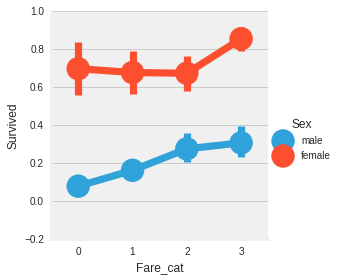

In [44]:
train_set['Fare_cat']=0
train_set.loc[train_set['Fare']<=7.91,'Fare_cat']=0
train_set.loc[(train_set['Fare']>7.91)&(train_set['Fare']<=14.454),'Fare_cat']=1
train_set.loc[(train_set['Fare']>14.454)&(train_set['Fare']<=31),'Fare_cat']=2
train_set.loc[(train_set['Fare']>31)&(train_set['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat','Survived',data=train_set,hue='Sex', order = [0,1,2,3])
plt.show()

##### As the graph above shows, the survival for male passenger increases as the fare paid increases. For female passengers however, the survival is almost constant all the way from fare category of 0 to 2 and there is a high rise for fare category 3. It is related to class 1 probably! If you pay more, you survive. What a world we live in!

### It is time to do some Machine Learning!

##### Machine Learning models only accept numeric values and we cannot pass strings. Therefore I have to convert strings to numeric values

In [45]:
train_set['Sex'].replace(['male','female'],[0,1],inplace=True)
train_set['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_set['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

##### Now let's get rid of the features that are useless

In [46]:
train_set.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [47]:
train_set.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1


##### Now let's create another heat mep with the new looking table to see the correlation between different parameters

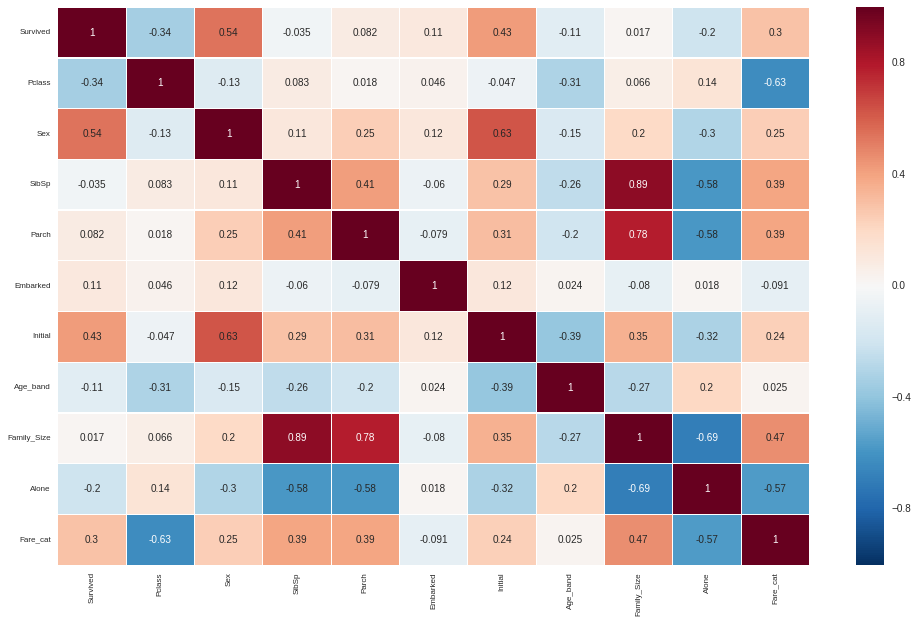

In [48]:
sns.heatmap(train_set.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

##### The first step would be to import all the Machine Learning packages that we want to use.

In [49]:
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbour
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree 
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

##### I divide the data set into train and test set and slice the data. In Machine learning X usually represents the features and Y represents the actual values which in this case is survival. 

##### Usually in Machine Learning we divide the data into 70% training set and 30% test set. The reason behind it is to avoid overfitting and check the performance of the model in unseen data.

In [50]:
train,test=train_test_split(train_set,test_size=0.3,random_state=0,stratify=train_set['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_set[train_set.columns[1:]]
Y=train_set['Survived']

### Support vector machine

##### There are four kernels available in the SVM algorithm. First I try the gaussian (radial) kernel here.

In [124]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

('Accuracy for rbf SVM is ', 0.83582089552238803)


##### And now the linear support vector machine:

In [52]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

('Accuracy for linear SVM is', 0.81716417910447758)


##### As it shows, the linear kernel has a little less accuracy than the radial kernel.

##### Logistic regression Model:

In [53]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

('The accuracy of the Logistic Regression is', 0.81716417910447758)


##### Interesting enough, this is as accuate as the linear kernel.

##### Descision Tree Model:

In [54]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

('The accuracy of the Decision Tree is', 0.80970149253731338)


##### This is the least accurate of all so far.

##### K-Nearest Neighbours(KNN):

In [55]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

('The accuracy of the KNN is', 0.83208955223880599)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


##### One thing that I can study here is to see if changing the number of neighbours change the prediction accuracy:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


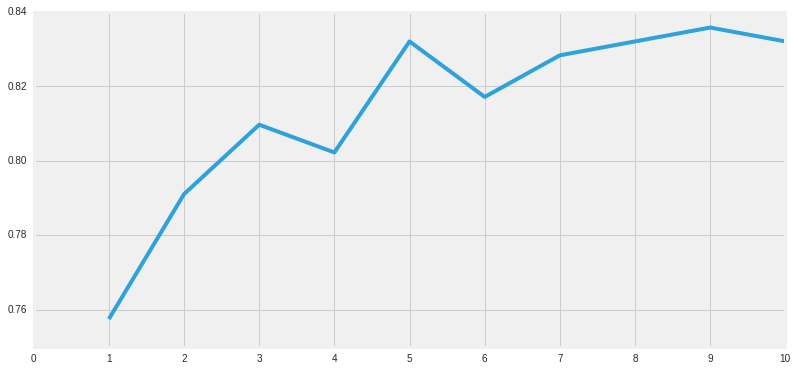

('Accuracies for different values of n are:', array([ 0.75746269,  0.79104478,  0.80970149,  0.80223881,  0.83208955,
        0.81716418,  0.82835821,  0.83208955,  0.8358209 ,  0.83208955]), 'with the max value as ', 0.83582089552238803)


In [56]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

##### The accuracy is maximum when the number of neighbours is 5.

##### Gaussian Naive Bayes:

In [57]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Naive Bayes is',metrics.accuracy_score(prediction6,test_Y))

('The accuracy of the Naive Bayes is', 0.81343283582089554)


##### Random Forests:

In [58]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('The accuracy of the Random Forests is', 0.81716417910447758)


##### Here I do the cross validation. 

##### The K-fold method divides the data into k-1 training sets and the resulting model is validated on the remaining of the data. So the performance measure in this case is the average that comes from the loop.

##### The cross_val_score is called to use the cross validation on the data.

##### The cross_val_predict is called to get the prediction for that data set.

In [59]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=8) # k=8, split the data into 8 equal parts
Mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    Mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
result_table=pd.DataFrame({'CV Mean':Mean,'Std':std},index=classifiers)       
result_table

,CV Mean,Std
Linear Svm,0.790038,0.025623
Radial Svm,0.828266,0.025235
Logistic Regression,0.808076,0.015586
KNN,0.811474,0.029472
Decision Tree,0.803622,0.024047
Naive Bayes,0.801410,0.022035
Random Forest,0.813807,0.030583


<function matplotlib.pyplot.show>

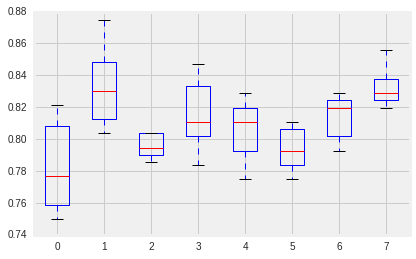

In [60]:
boxdata =pd.DataFrame(accuracy,index= [classifiers])
boxdata.plot.box()
plt.show


##### confusion matrix is a good way to describe the performance of a model.

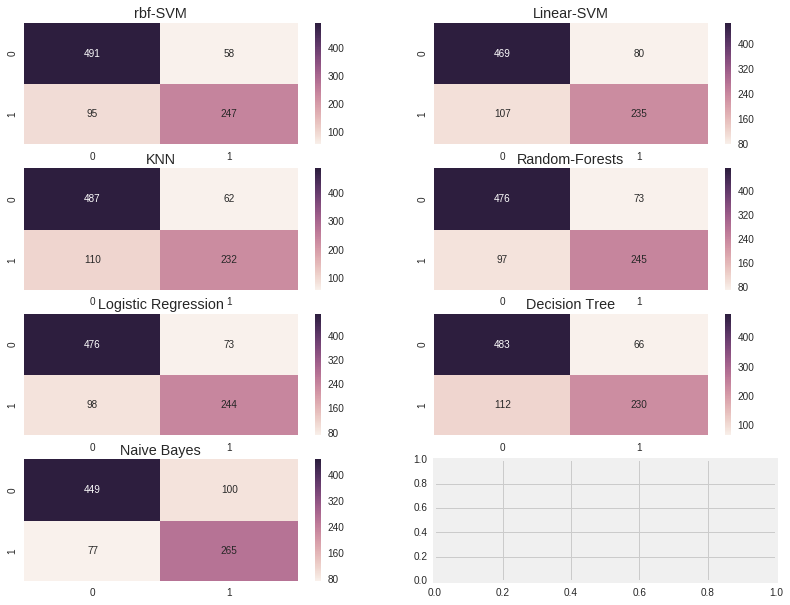

In [61]:
f,ax=plt.subplots(4,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[3,0],annot=True,fmt='2.0f')
ax[3,0].set_title('Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Now it is finally time to look at the actual test data and predict the result. 

In [178]:
test_set  = pd.read_csv('./test.csv')

In [138]:
test_set.head(1000)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [64]:
num_lines = sum(1 for line in test_set)
print num_lines

11


In [179]:

test_set['Initial']=0
for i in test_set:
    test_set['Initial']=test_set.Name.str.extract('([A-Za-z]+)\.')
test_set['Initial'].replace(['Mlle','Dona','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                             ['Miss','Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']
                             ,inplace=True)

test_set.loc[(test_set.Age.isnull())&(test_set.Initial=='Mr'),'Age']=33
test_set.loc[(test_set.Age.isnull())&(test_set.Initial=='Mrs'),'Age']=36
test_set.loc[(test_set.Age.isnull())&(test_set.Initial=='Master'),'Age']=5
test_set.loc[(test_set.Age.isnull())&(test_set.Initial=='Miss'),'Age']=22
test_set.loc[(test_set.Age.isnull())&(test_set.Initial=='Other'),'Age']=46


test_set['Age_band']=0
test_set.loc[test_set['Age']<=16,'Age_band']=0
test_set.loc[(test_set['Age']>16)&(test_set['Age']<=32),'Age_band']=1
test_set.loc[(test_set['Age']>32)&(test_set['Age']<=48),'Age_band']=2
test_set.loc[(test_set['Age']>48)&(test_set['Age']<=64),'Age_band']=3
test_set.loc[test_set['Age']>64,'Age_band']=4


test_set['Family_Size']=0
test_set['Family_Size']=test_set['Parch'] + test_set['SibSp']#definition of the family size
test_set['Alone']=0
test_set.loc[test_set.Family_Size==0,'Alone']=1


test_set['Fare_cat']=0
test_set.loc[test_set['Fare']<=7.91,'Fare_cat']=0
test_set.loc[(test_set['Fare']>7.91)&(test_set['Fare']<=14.454),'Fare_cat']=1
test_set.loc[(test_set['Fare']>14.454)&(test_set['Fare']<=31),'Fare_cat']=2
test_set.loc[(test_set['Fare']>31)&(test_set['Fare']<=513),'Fare_cat']=3


test_set['Sex'].replace(['male','female'],[0,1],inplace=True)
test_set['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_set['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

IDs = test_set['PassengerId']
test_set.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
test_set.head(500)

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,3,0,0,0,2,0,2,0,1,0
1,3,1,1,0,0,1,2,1,0,0
2,2,0,0,0,2,0,3,0,1,1
3,3,0,0,0,0,0,1,0,1,1
4,3,1,1,1,0,1,1,2,0,1
5,3,0,0,0,0,0,0,0,1,1
6,3,1,0,0,2,2,1,0,1,0
7,2,0,1,1,0,0,1,2,0,2
8,3,1,0,0,1,1,1,0,1,0
9,3,0,2,0,0,0,1,2,0,2


##### Since rbf SVM has the higher accuracy I use that to predict for the test set.

In [184]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction = model.predict(test_set)
output = pd.DataFrame({ 'PassengerId' : IDs, 'Survived': prediction })
output.to_csv('titanic_predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
